# Homework 5: Analyzing Data Using Distribution Charts
Heather Marsh


# Table 12 - Resident Population--States (pg. 18 in PDF)

#boxplot: Show the distributions of the population of all states in 1970, 1985, 1995, and 2009
this should result in 4 separate boxplot glyphs in a single chart


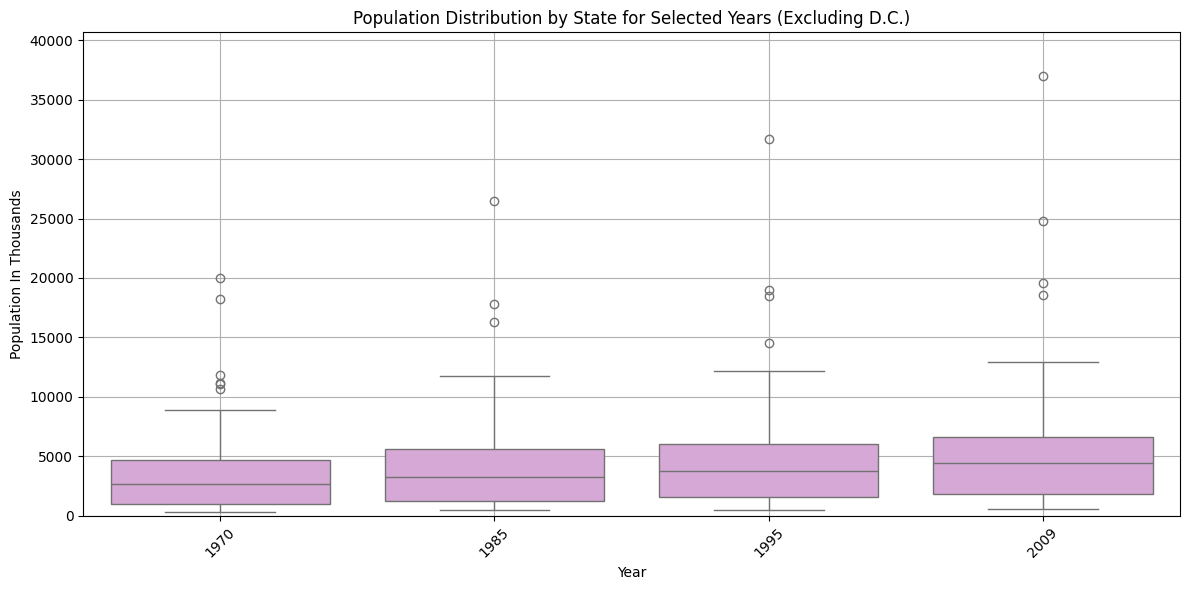

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS625/HW5/Tab12.csv')

years = ['1970', '1985', '1995', '2009']
pop_data = data[['State'] + years]

pop_melted = pop_data.melt(id_vars=['State'], value_vars=years, var_name='Year', value_name='Population')

pop_melted['Population'] = pd.to_numeric(pop_melted['Population'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Population', data=pop_melted, color='plum')

plt.ylim(0, pop_melted['Population'].max() * 1.1)

plt.title('Population Distribution by State for Selected Years (Excluding D.C.)')
plt.xlabel('Year')
plt.ylabel('Population In Thousands')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


# histogram: Show the distribution of the population of all states in one of the years (your chart title must indicate which year)
your histogram should use a reasonable bin size for the data


<ipython-input-31-4d2c50aca6fc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_data[year] = pd.to_numeric(pop_data[year], errors='coerce')


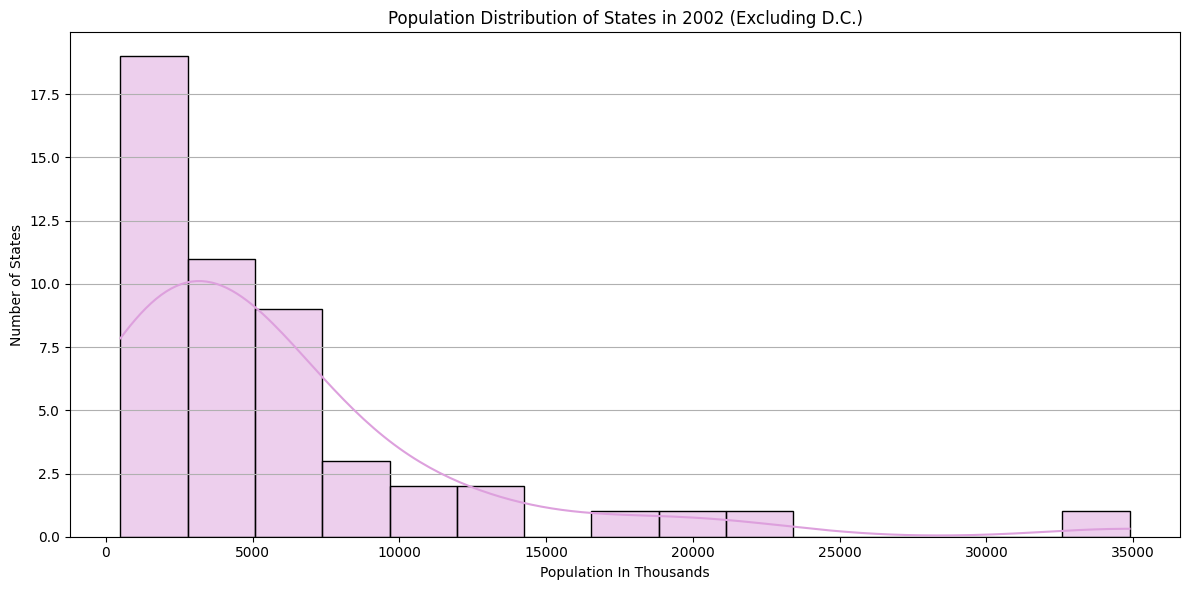

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS625/HW5/Tab12.csv')

year = '2002'
pop_data = data[['State', year]]

pop_data[year] = pd.to_numeric(pop_data[year], errors='coerce')

plt.figure(figsize=(12, 6))
sns.histplot(pop_data[year].dropna(), bins=15, color='plum', kde=True)

# Add titles and labels
plt.title(f'Population Distribution of States in {year} (Excluding D.C.)')
plt.xlabel('Population In Thousands')
plt.ylabel('Number of States')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# eCDF: Show the distributions of the population of all states in two of the years (your legend must indicate which years)


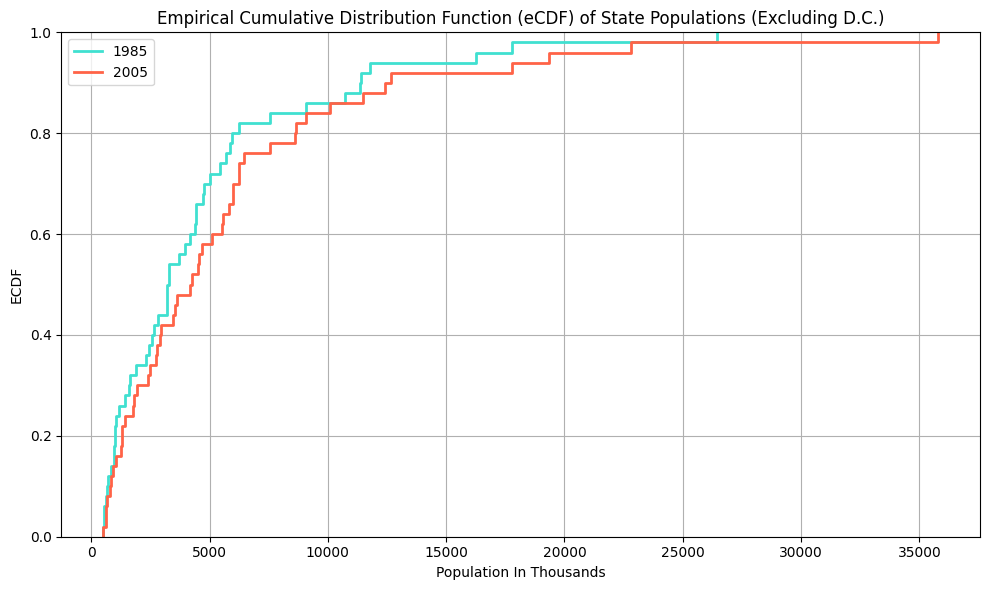

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS625/HW5/Tab12.csv')

population_1985 = pd.to_numeric(data['1985'], errors='coerce').dropna()
population_2005 = pd.to_numeric(data['2005'], errors='coerce').dropna()

plt.figure(figsize=(10, 6))

sns.ecdfplot(population_1985, label='1985', color='turquoise', linewidth=2)

sns.ecdfplot(population_2005, label='2005', color='tomato', linewidth=2)

plt.title('Empirical Cumulative Distribution Function (eCDF) of State Populations (Excluding D.C.)')
plt.xlabel('Population In Thousands')
plt.ylabel('ECDF')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


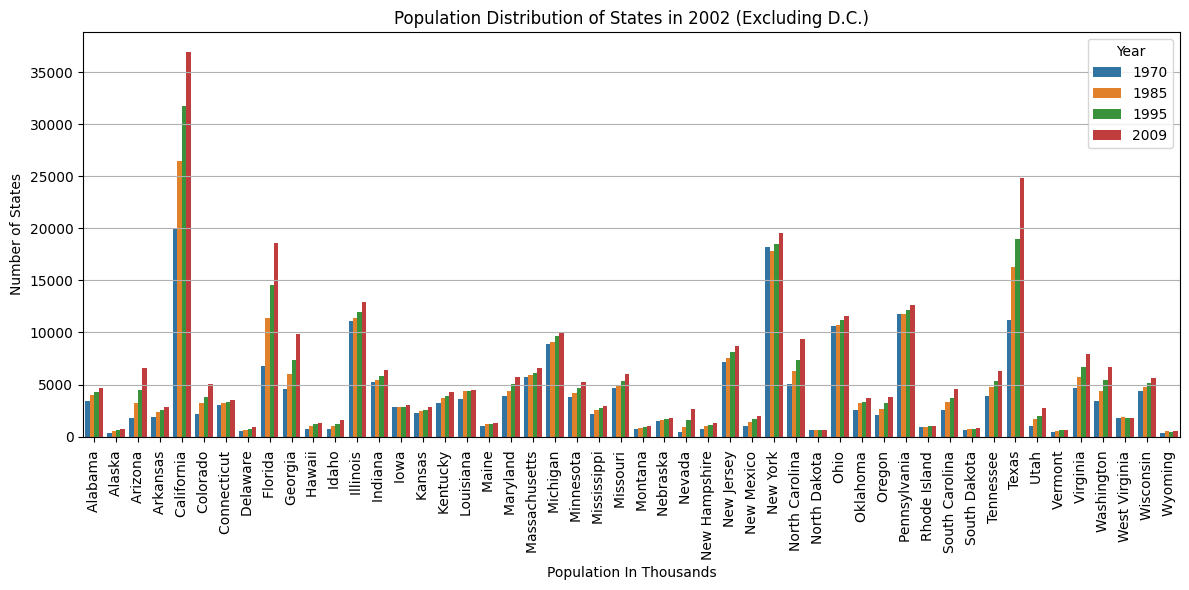

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS625/HW5/Tab12.csv')

years = ['1970', '1985', '1995', '2009']
pop_data = data[['State'] + years]

pop_melted = pop_data.melt(id_vars=['State'], value_vars=years, var_name='Year', value_name='Population')

pop_melted['Population'] = pd.to_numeric(pop_melted['Population'], errors='coerce')

plt.figure(figsize=(12, 6))

sns.barplot(pop_melted, x="State", y="Population", hue="Year")

# Add titles and labels
plt.title(f'Population Distribution of States in {year} (Excluding D.C.)')
plt.xlabel('Population In Thousands')
plt.ylabel('Number of States')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

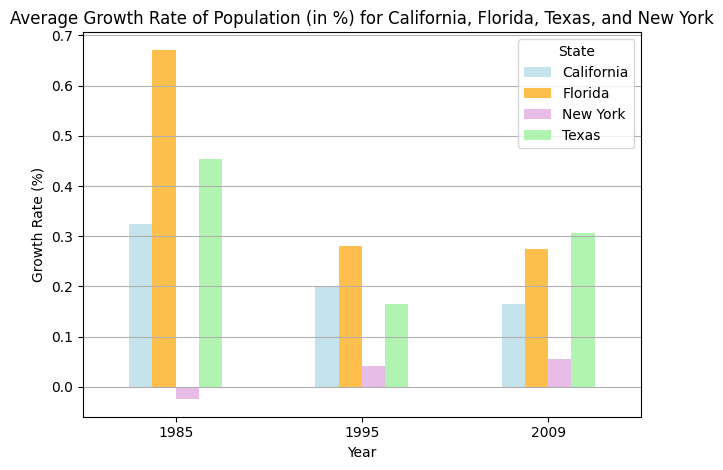

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS625/HW5/Tab12.csv')

data['State'] = data['State'].str.strip()

years = ['1970', '1985', '1995', '2009']
pop_data = data[['State'] + years]

pop_melted = pop_data.melt(id_vars=['State'], value_vars=years, var_name='Year', value_name='Population')

pop_melted['Population'] = pd.to_numeric(pop_melted['Population'], errors='coerce')

selected_states = pop_melted[pop_melted['State'].isin(['California','Florida', 'New York', 'Texas'])]

pivot_data = selected_states.pivot(index='Year', columns='State', values='Population')

growth_rates = pivot_data.pct_change()
growth_rates = growth_rates.dropna()

plt.figure(figsize=(12, 6))
growth_rates.plot(kind='bar', color=['lightblue', 'orange', 'plum', 'lightgreen'], alpha=0.7)

plt.title('Average Growth Rate of Population (in %) for California, Florida, Texas, and New York')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.legend(title='State')
plt.show()

Average Percentage Growth from 1985 to 2009:
California: 0.23%
Florida: 0.41%
New York: 0.02%
Texas: 0.31%


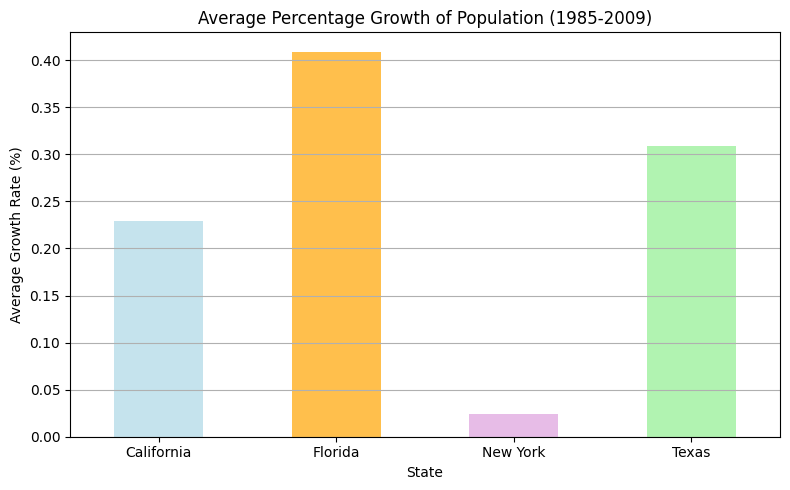

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS625/HW5/Tab12.csv')

data['State'] = data['State'].str.strip()

years = ['1970', '1985', '1995', '2009']
pop_data = data[['State'] + years]

pop_melted = pop_data.melt(id_vars=['State'], value_vars=years, var_name='Year', value_name='Population')

pop_melted['Population'] = pd.to_numeric(pop_melted['Population'], errors='coerce')

pop_melted = pop_melted[pop_melted['State'] != 'District of Columbia']

selected_states = pop_melted[pop_melted['State'].isin(['California','Florida', 'New York', 'Texas'])]

pivot_data = selected_states.pivot(index='Year', columns='State', values='Population')

growth_rates = pivot_data.pct_change()
growth_rates = growth_rates.dropna()

average_growth = growth_rates.mean()

print("Average Percentage Growth from 1985 to 2009:")
for state in average_growth.index:
    print(f"{state}: {average_growth[state]:.2f}%")

plt.figure(figsize=(8, 5))
average_growth.plot(kind='bar', color=['lightblue', 'orange', 'plum', 'lightgreen'], alpha=0.7)

plt.title('Average Percentage Growth of Population (1985-2009)')
plt.xlabel('State')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()



*   https://www.datacamp.com/tutorial/seaborn-barplot
*   https://seaborn.pydata.org/generated/seaborn.barplot.html

*  https://matplotlib.org/stable/users/explain/colors/colors.html#sphx-glr-users-explain-colors-colors-py
*   https://pandas.pydata.org/docs/dev/getting_started/intro_tutorials/03_subset_data.html
*   https://www.digitalocean.com/community/tutorials/pandas-melt-unmelt-pivot-function



